<h1>Data visualisation and cleaning </h1>

In [253]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import joblib

In [255]:
df = pd.read_csv("global_route_dataset.csv")
df.columns

Index(['latitude', 'longitude', 'region'], dtype='object')

In [257]:
df.head()

,latitude,longitude,region
0,41.457871,-71.906967,North America
1,40.505404,-72.619049,North America
2,41.684333,-73.916554,North America
3,42.997345,-74.976405,North America
4,40.361570,-72.958665,North America


In [259]:
df.describe()

,latitude,longitude
count,3000.000000,3000.000000
mean,41.740913,22.681990
std,5.652442,88.378061
min,30.924444,-78.416583
25%,36.644978,-72.908919
50%,40.750751,2.352477
75%,47.883227,138.647135
max,54.745957,144.339149


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   3000 non-null   float64
 1   longitude  3000 non-null   float64
 2   region     3000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 70.4+ KB


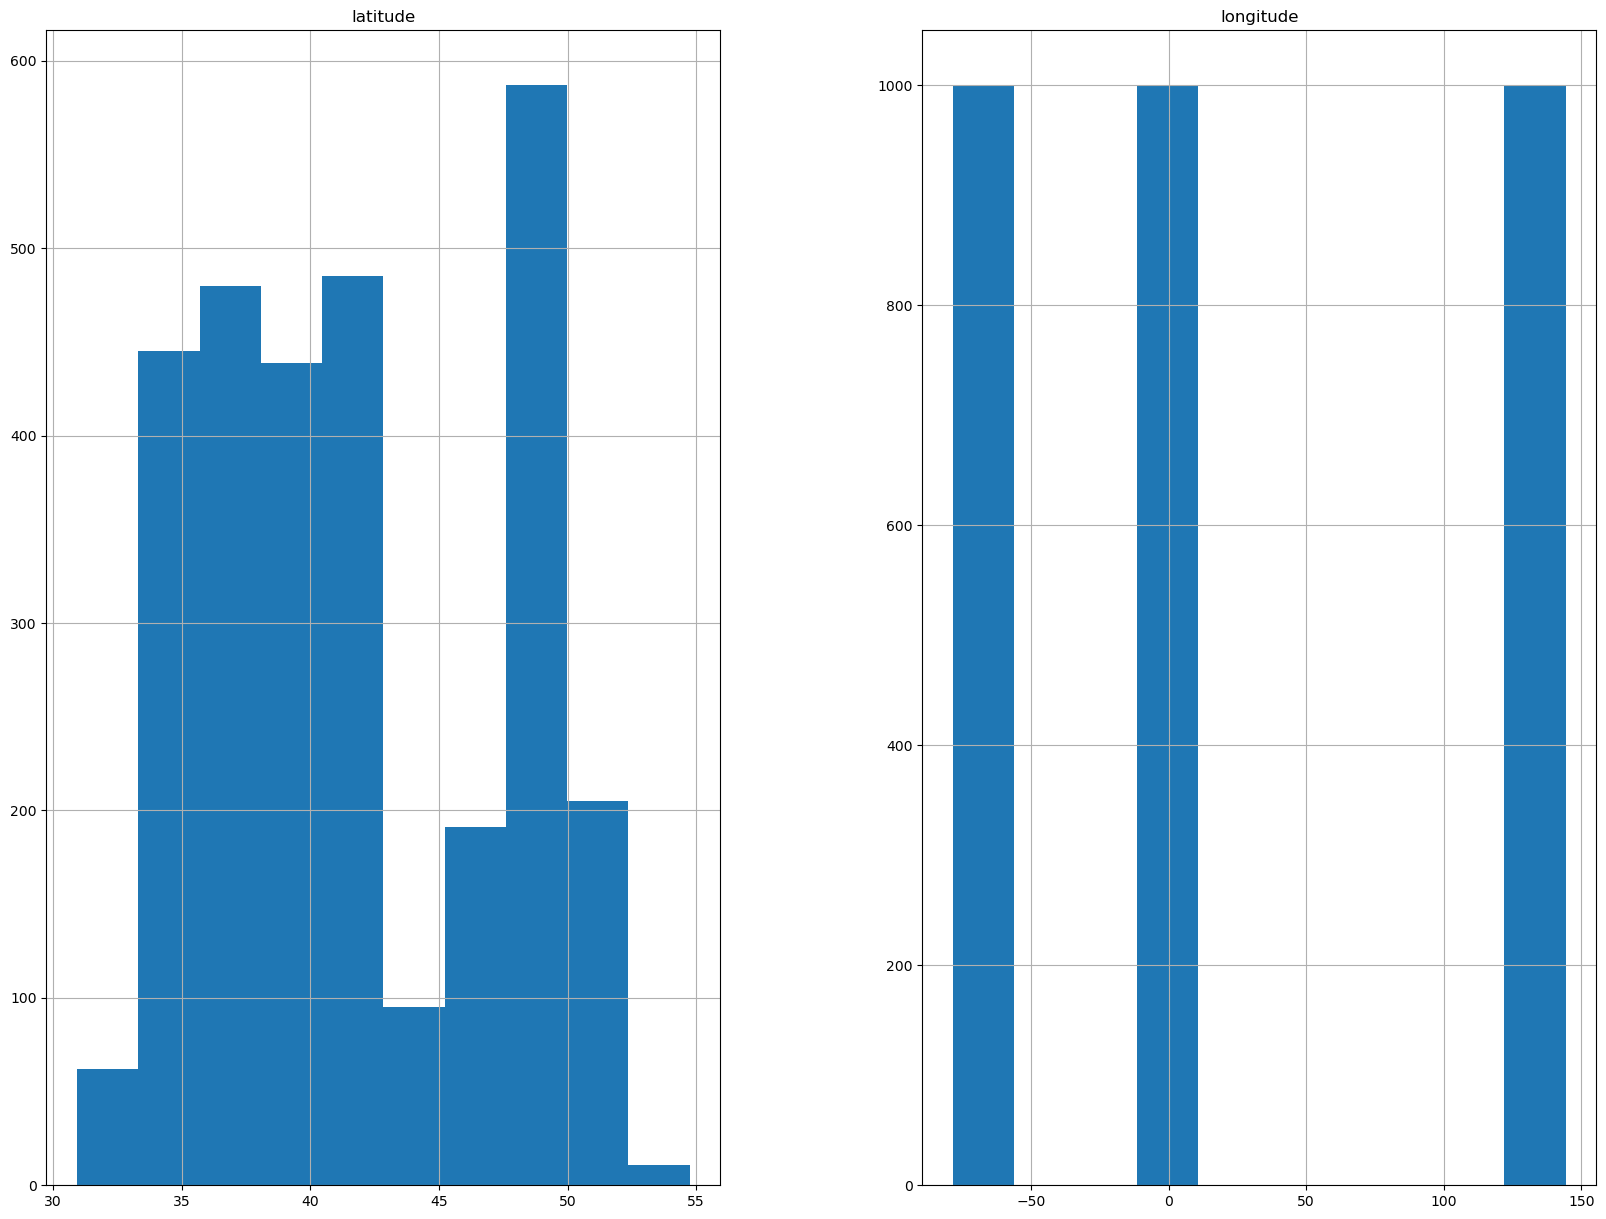

In [263]:
# Displying Histograms
df.hist(figsize=(20,15))
plt.show()

<h2> Data Cleaning </h2>

In [266]:
print("Number of duplicates :", df.duplicated().sum())

Number of duplicates : 0


<h2>Missing Values </h2>

In [269]:
df.isna().sum()

latitude     0
longitude    0
region       0
dtype: int64

<h2>Normalizing numerical features</h2>

In [272]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df[['latitude', 'longitude', 'urgency']])
# X_scaled
# Use only latitude and longitude
X = df[['latitude', 'longitude']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.05008259, -1.07045487],
       [-0.21861622, -1.07851344],
       [-0.01001153, -1.09319719],
       ...,
       [-0.24454531,  1.30352268],
       [-0.85629642,  1.33213219],
       [-1.29585282,  1.30432261]])

<h1> Modeling </h1>

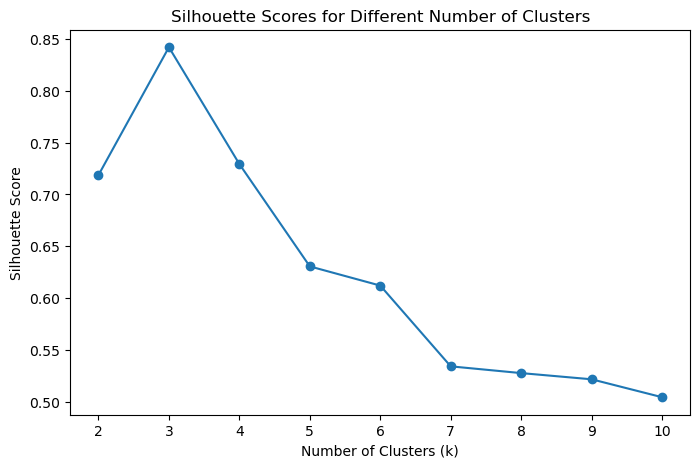

In [275]:
# List to store the silhouette scores for different k
silhouette_scores = []

# Loop through different values of k (from 2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Fit the model on scaled data
    labels = kmeans.labels_  # Get the cluster labels
    score = silhouette_score(X_scaled, labels)  # Calculate silhouette score
    silhouette_scores.append(score)  # Append the score to the list

# Plotting the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [276]:
# Train the KMeans model with the optimal number of clusters (e.g., k=4)
optimal_k = 3 # 2 presents the best k with the highest silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
df['cluster'] = kmeans.labels_

# Print the updated dataframe with cluster labels
print(df.head())


    latitude  longitude         region  cluster
0  41.457871 -71.906967  North America        2
1  40.505404 -72.619049  North America        2
2  41.684333 -73.916554  North America        2
3  42.997345 -74.976405  North America        2
4  40.361570 -72.958665  North America        2


<h1>Evaluation</h1>

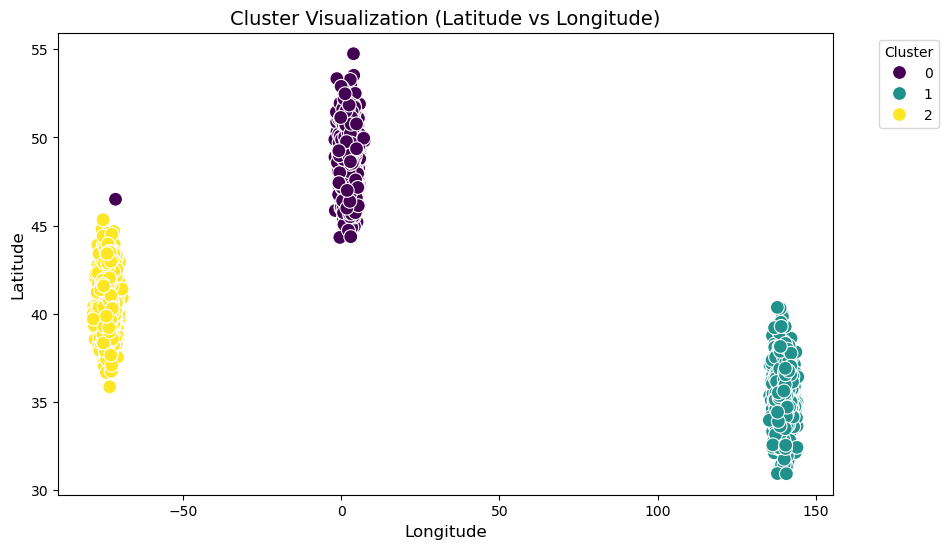

In [280]:
# Create a scatter plot to visualize the clusters based on latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='cluster', palette='viridis', s=100, marker='o')

# Title and labels
plt.title('Cluster Visualization (Latitude vs Longitude)', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [282]:
score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.8420670960995512


In [284]:
print(f"Inertia (WCSS): {kmeans.inertia_}")

Inertia (WCSS): 205.569632074697


In [286]:
joblib.dump(scaler, 'route_optimization_scaler.pkl')
joblib.dump(kmeans, 'route_optimization_model.pkl')

['route_optimization_model.pkl']